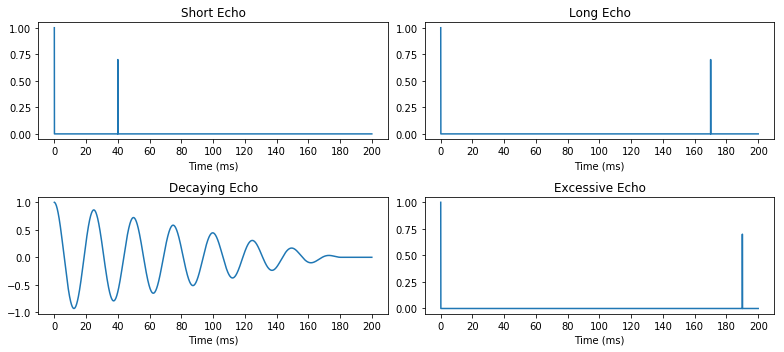

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(11,5))

x = np.arange(0.01,16*np.pi,0.01)
x_scaled = (x / np.max(x)) * 200

y = np.zeros(x.shape)
y[0] = 1
y[len(y) / 5] = 0.7
plt.subplot(221)
plt.plot(x_scaled, y)
plt.title("Short Echo")
plt.xlabel("Time (ms)")
plt.xticks(np.arange(0,201,20))
plt.plot()

y = np.zeros(x.shape)
y[0] = 1
y[17 * len(y) / 20] = 0.7
plt.subplot(222)
plt.plot(x_scaled, y)
plt.title("Long Echo")
plt.xlabel("Time (ms)")
plt.xticks(np.arange(0,201,20))
plt.plot()

y = (np.cos(x) * (1 - (x/(np.max(x)*0.9))))
y[int(len(y)*0.9):] = 0
#y = y / np.sum(y)
plt.subplot(223)
plt.plot(x_scaled, y)
plt.title("Decaying Echo")
plt.xticks(np.arange(0,201,20))
plt.xlabel("Time (ms)")

y = np.zeros(x.shape)
y[0] = 1
y[19 * len(y) / 20] = 0.7
plt.subplot(224)
plt.plot(x_scaled, y)
plt.title("Excessive Echo")
plt.xlabel("Time (ms)")
plt.xticks(np.arange(0,201,20))
plt.plot()
plt.tight_layout()
plt.savefig("img/H.pdf")
plt.show()

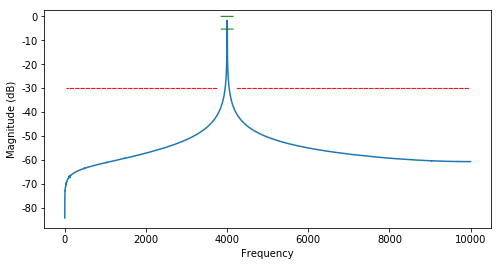

In [2]:
x = np.linspace(0, 2*np.pi, num=20000)
y = np.sin(4000*x)# + (np.random.normal(size=(20000,)) * 0.001)
y += np.sin(4001*x)
y += np.sin(4004*x)
#y += sum([np.sin(f*x)*np.random.normal()*0.001 for f in np.arange(10, 10000, 1)])


plt.figure(figsize=(8,4))
plt.magnitude_spectrum(y, Fs=20000, scale='dB')#, window=None)
plt.annotate("",
              xy=(0, -113), xycoords='data',
              xytext=(3800, -113), textcoords='data',
              arrowprops=dict(arrowstyle="-",
                              connectionstyle="arc3,rad=0.",
                              ls="dashed",
                             color='red'), 
              )
plt.annotate("",
              xy=(3800, -20), xycoords='data',
              xytext=(4200, -20), textcoords='data',
              arrowprops=dict(arrowstyle="-",
                              connectionstyle="arc3,rad=0.",
                              color='green'), 
              )
plt.annotate("",
              xy=(3800, 0), xycoords='data',
              xytext=(4200, 0), textcoords='data',
              arrowprops=dict(arrowstyle="-",
                              connectionstyle="arc3,rad=0.",
                              color='green'), 
              )
plt.annotate("",
              xy=(4200, -113), xycoords='data',
              xytext=(10000, -113), textcoords='data',
              arrowprops=dict(arrowstyle="-",
                              connectionstyle="arc3,rad=0.",
                              ls="dashed",
                             color='red'), 
              )
ticks = np.arange(-300, 1, 37.5)
#labels = [str(t/4) for t in ticks]
labels = [str(x) for x in np.arange(-80, 1, 10)]
plt.yticks(ticks, labels)
plt.savefig("img/single-freq.pdf")
plt.show()


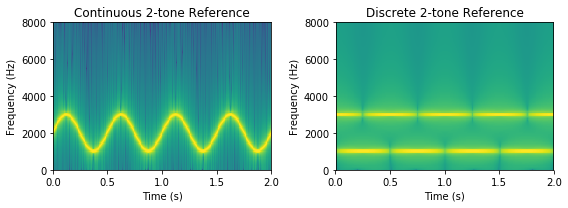

In [10]:
import scipy.signal
from audio_generation import get_ref_discrete, get_ref_continuous, get_h

ref = get_ref_continuous(2, 1000, 3000, period=0.5)
ref_2f = get_ref_discrete(2, 1000, 3000, period=0.5)
plt.figure(figsize=(8,3))
plt.subplot(121)
plt.specgram(ref, Fs=16000)
plt.title("Continuous 2-tone Reference")
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.subplot(122)
plt.specgram(ref_2f, Fs=16000)
plt.title("Discrete 2-tone Reference")
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.tight_layout()
plt.savefig("img/reference.pdf")
plt.show()
